<a href="https://colab.research.google.com/github/pushpalatha2297/hds5210-2023/blob/main/week13/week13_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BRFSS_data = pd.read_csv('/cleaned_BRFSS.csv')
BRFSS_data

,STATEFIP,Income,Date,Avegdrnk,menthlth,weight_lbs,height_in,weight_kgs,genhlth,maxdrnks,Smoke,usenow3,exerany2,Fruits,fvgreen,chcscncr,chccopd3,BMI
0,29,6.0,2021-01-30,4,88,245.0,510.0,11113.000000,3,7,1,2,1,206,255,2,2,0.662188
1,29,2.0,2021-10-07,1,1,117.0,501.0,5307.000000,1,2,2,3,1,102,204,2,2,0.327692
2,29,8.0,2021-11-07,4,7,180.0,507.0,8165.000000,3,7,1,3,2,300,202,2,2,0.492280
3,29,99.0,2021-11-02,5,88,195.0,604.0,8845.000000,1,77,2,3,1,205,777,2,2,0.375765
4,29,2.0,2021-12-04,4,88,270.0,600.0,12247.000000,4,7,1,3,1,203,315,2,1,0.527250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,29,99.0,2021-11-10,4,88,200.0,600.0,9072.000000,2,7,7,3,1,101,202,2,2,0.390556
12261,29,99.0,2021-05-12,4,88,9999.0,506.0,8538.046278,4,7,1,2,2,206,255,2,2,27.454331
12262,29,7.0,2021-08-25,2,88,220.0,510.0,9979.000000,2,2,2,3,1,101,203,2,2,0.594617
12263,29,99.0,2021-09-02,1,88,235.0,508.0,10659.000000,3,1,2,3,2,201,202,2,2,0.640171


In [2]:
BRFSS_data.shape

(12265, 18)

The Behavioral Risk Factor Surveillance System (BRFSS) is a telephone-based survey that collects data at the state level about health-related risk behaviors, chronic health issues, and the use of preventive services by adult Americans. The dataset has 18 columns and 12,265 rows.

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [3]:
#Calculating the number of unique values in each column
unique_values = BRFSS_data.nunique()

# Print the number of unique values for each column
print("Unique values in each column:\n", unique_values)

if 'RecordID' in unique_values:
    unique_values = unique_values.drop('RecordID')

#Identifys the columns with the most unique values
column_with_most_diversity = unique_values.idxmax()

# Print the name of the column with the second most unique values
print("Column with the most unique values:", column_with_most_diversity)

if 'unique_id_column' in unique_values:
    unique_values = unique_values.drop('unique_id_column')

# Now, we find the column with the next highest number of unique values.
temp_unique_values = unique_values.drop(column_with_most_diversity)
column_with_next_most_diversity = temp_unique_values.idxmax()
print("Column with the next most unique values:", column_with_next_most_diversity)

Unique values in each column:
 STATEFIP         1
Income          14
Date           354
Avegdrnk        24
menthlth        33
weight_lbs     297
height_in       39
weight_kgs     295
genhlth          7
maxdrnks        32
Smoke            4
usenow3          5
exerany2         4
Fruits          68
fvgreen         61
chcscncr         4
chccopd3         4
BMI           2311
dtype: int64
Column with the most unique values: BMI
Column with the next most unique values: Date


Among all the columns in the dataset, 'BMI' possesses the highest number of unique values, indicating it has the greatest diversity. The 'Date' column follows as the second most diverse, containing the next highest count of unique entries.

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [4]:
# Calculate the number of unique values in each column
unique_values = BRFSS_data.nunique()

# Identify columns where the number of unique values is 1
redundant_columns = unique_values[unique_values == 1].index.tolist()

# Print the redundant columns
print("Columns with redundant data (same value for every row):", redundant_columns)

Columns with redundant data (same value for every row): ['STATEFIP']


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

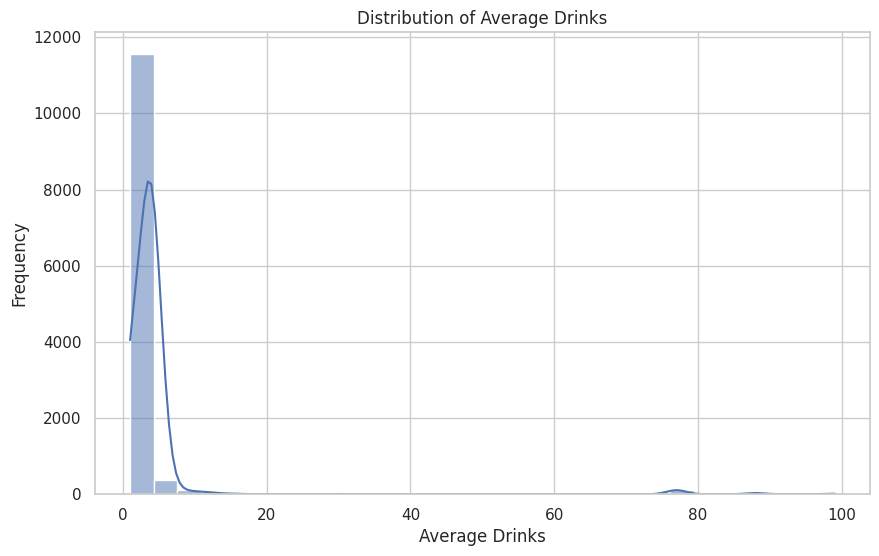

In [5]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a histogram for the 'Avegdrnk' column
plt.figure(figsize=(10, 6))
sns.histplot(BRFSS_data['Avegdrnk'], kde=True, bins=30)
plt.title('Distribution of Average Drinks')
plt.xlabel('Average Drinks')
plt.ylabel('Frequency')
plt.show()

This histogram illustrates the frequency distribution of "Average Drinks" on the x-axis, ranging from 0 to 100 drinks. The y-axis shows how frequently each range of beverages occurs in the sample. The majority of the data is clustered near 0, indicating that the majority of the observed values are low, with very few persons averaging more drinks. There is a sharp peak around 0 and the distribution is skewed to the right, indicating that there are outliers who consume much more beverages than the average. Overall, this shows that in this dataset, a low average number of drinks is the most prevalent, with very few instances of high consumption.

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

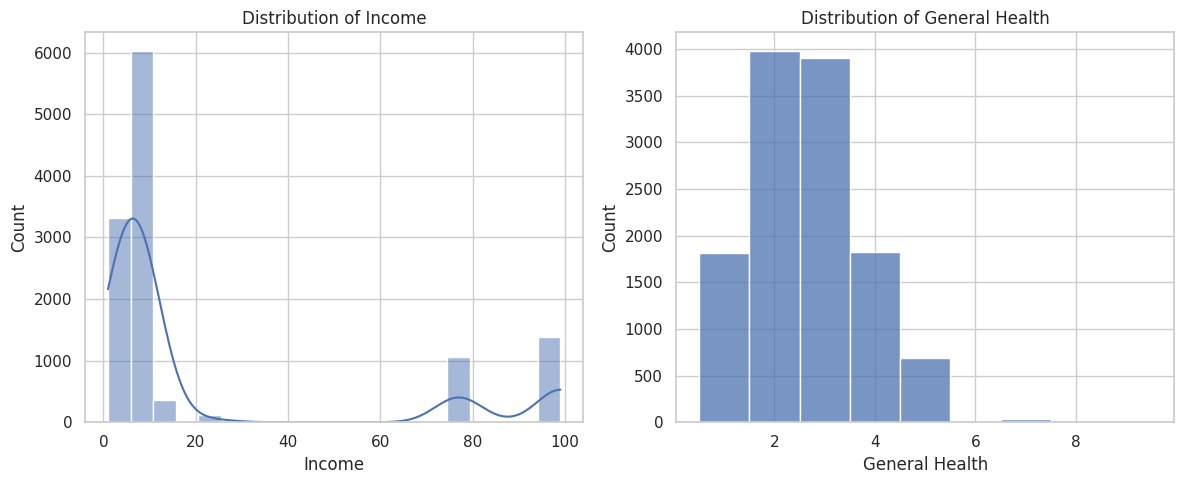

In [6]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Income distribution
sns.histplot(BRFSS_data['Income'], kde=True, bins=20, ax=axes[0])
axes[0].set_title('Distribution of Income')
axes[0].set_xlabel('Income')

# Plot genhlth distribution
sns.histplot(BRFSS_data['genhlth'], bins=5, discrete=True, ax=axes[1])
axes[1].set_title('Distribution of General Health')
axes[1].set_xlabel('General Health')

# Show plots
plt.tight_layout()
plt.show()

The two histograms provided depict the distributions of "Income" and "General Health" within a dataset.

#1. *Distribution of Income*:
   - The x-axis represents "Income," which could be a stand-in for various income brackets, scores, or some other numerical representation of income.
   - The y-axis shows the count of individuals in each income bracket.
   - The distribution is right-skewed, with the highest frequency at the lower end of the income scale, indicating that a large number of individuals fall into the lower income brackets.
   - There are also a few peaks at higher income levels, which may represent common income levels, but significantly fewer people fall into these higher income brackets.

#2. *Distribution of General Health*:
   - The x-axis labeled "General Health" suggests a rating or score for general health status, which appears to be discrete, given the whole number values.
   - The y-axis, similar to the first histogram, indicates the number of individuals associated with each health score.
   - This histogram is left-skewed, with a concentration of higher counts in the higher general health scores, suggesting that more individuals in this dataset have reported higher general health ratings.
   - The counts decrease as the health score decreases, implying fewer individuals report lower health scores.

   Overall, both histograms suggest there are common values where most of the population is concentrated, with fewer individuals at the extreme ends of the scale for both income and health.



---



## Submitting Your Work

Submit your work as usual.